<a href="https://colab.research.google.com/github/devangi2000/TensorFlow01/blob/master/Conv1D_tf_week3_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0


In [30]:
dataset, info = tfds.load('imdb_reviews/subwords8k', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [31]:
tokenizer = info.features['text'].encoder

In [32]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [34]:
num_epochs=10
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 240s 615ms/step - loss: 0.4540 - accuracy: 0.7730 - val_loss: 0.3276 - val_accuracy: 0.8634
Epoch 2/10
391/391 [==============================] - 241s 617ms/step - loss: 0.2224 - accuracy: 0.9173 - val_loss: 0.2991 - val_accuracy: 0.8788
Epoch 3/10
391/391 [==============================] - 242s 619ms/step - loss: 0.1716 - accuracy: 0.9380 - val_loss: 0.3418 - val_accuracy: 0.8696
Epoch 4/10
391/391 [==============================] - 245s 625ms/step - loss: 0.1360 - accuracy: 0.9522 - val_loss: 0.3662 - val_accuracy: 0.8680
Epoch 5/10
391/391 [==============================] - 242s 620ms/step - loss: 0.1089 - accuracy: 0.9617 - val_loss: 0.4257 - val_accuracy: 0.8643
Epoch 6/10
391/391 [==============================] - 241s 617ms/step - loss: 0.0848 - accuracy: 0.9727 - val_loss: 0.4722 - val_accuracy: 0.8613
Epoch 7/10
391/391 [==============================] - 250s 639ms/step - loss: 0.0670 - accuracy: 0.9791 - val_loss: 0.5549 -

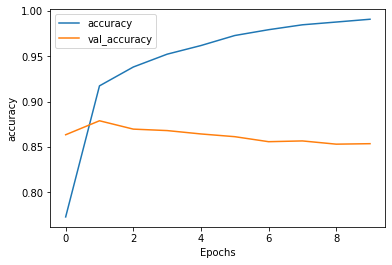

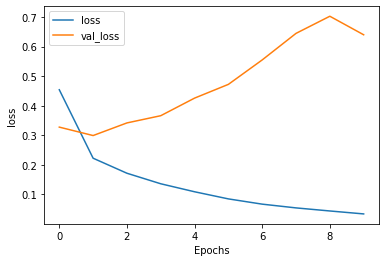

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')